In [190]:
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [191]:
basePath = "C:\\Users\\taylan\\Desktop\\data_mining\\data"

files = glob.glob(basePath + "/*")
isFirst = True
dataFrame = ""

for i in files:
    for j in glob.glob(i+"/*"):
        if len(j.split(".")) == 1 :
            for k in glob.glob(j + "/*"):
                if isFirst == True:
                    dataFrame = pd.read_json(k)
                    isFirst = False
                else:
                    dataFrame = pd.concat([dataFrame, pd.read_json(k)], ignore_index=True)
                
        else:
            dataFrame = pd.concat([dataFrame, pd.read_json(j)], ignore_index=True)

In [192]:
dataFrame = dataFrame.drop(["tags", "timestamp_str"], axis=1)

In [193]:
dataFrame = dataFrame[dataFrame["cmd"].isnull() == False]
dataFrame = dataFrame[dataFrame["cmd_type"].isnull() == False]

In [194]:
import re

def remove_non_english_words(text):
    english_word_pattern = re.compile(r'\b[a-zA-Z]+\b')

    english_words = english_word_pattern.findall(text)
    
    result_text = ' '.join(english_words)
    
    return result_text

In [195]:
commandList = dataFrame["cmd"]
commandListParametersRemoved = [] # initially empty list
for item in commandList:
    item = (item.split(" ")[0]).split("_")[0]
    item = remove_non_english_words(item)
    commandListParametersRemoved.append(item)
dataFrame["cmd"] = commandListParametersRemoved

dataFrame["username"] = dataFrame["username"].fillna("unknown_username")
dataFrame["wd"] = dataFrame["wd"].fillna("unknown_wd")



wdListRemoved = []
for item in dataFrame["wd"]:
    if "/" in item:
        item = item.split("/")[1]
    wdListRemoved.append(item)

dataFrame["wd"] = wdListRemoved

dataFrame

,cmd_type,pool_id,sandbox_id,hostname,cmd,ip,username,wd
0,bash-command,0,396,attacker,nmap,10.0.135.83,root,root
1,bash-command,0,396,attacker,nmap,10.0.135.83,root,root
2,bash-command,0,396,attacker,service,10.0.135.83,root,root
3,bash-command,0,396,attacker,msfdb,10.0.135.83,root,root
4,bash-command,0,396,attacker,msfconsole,10.0.135.83,root,root
...,...,...,...,...,...,...,...,...
21103,bash-command,1,374,attacker,msfconsole,10.1.135.83,root,root
21104,msf-command,1,374,attacker,use,10.1.135.83,unknown_username,unknown_wd
21105,msf-command,1,374,attacker,exploit,10.1.135.83,unknown_username,unknown_wd
21106,msf-command,1,374,attacker,exit,10.1.135.83,unknown_username,unknown_wd


In [196]:
dataFrame = dataFrame[dataFrame["cmd"].str.strip() != '']
dataFrame = dataFrame[dataFrame["username"].str.strip() != '']
dataFrame = dataFrame[dataFrame["wd"].str.strip() != '']

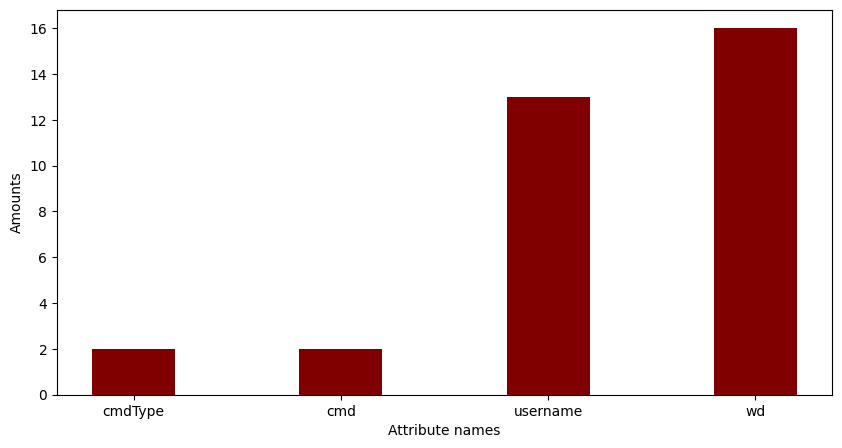

In [197]:
dataFrame
cmdTypeCount = len(dataFrame["cmd_type"].value_counts())
cmdCount = len(dataFrame["cmd"].value_counts())
usernameCount = len(dataFrame["username"].value_counts())
wdCount = len(dataFrame["wd"].value_counts())

plt.figure(figsize=(10,5))
plt.bar(["cmdType", "cmd", "username", "wd"], [cmdTypeCount, cmdTypeCount, usernameCount, wdCount], color= "maroon" ,width=0.4)
plt.xlabel("Attribute names")
plt.ylabel("Amounts")
plt.show()



In [198]:
print(dataFrame["cmd_type"].max(),
dataFrame["username"].max(),
dataFrame["wd"].max(),
dataFrame["cmd"].max(), sep=", ")

msf-command, vagrant, var, zip


In [199]:
newDataFrame = pd.DataFrame()
newDataFrame["cmd"] = pd.factorize(dataFrame["cmd"])[0] + 1
newDataFrame["username"] = pd.factorize(dataFrame["username"])[0] + 1
newDataFrame["hostname"] = pd.factorize(dataFrame["hostname"])[0] + 1
newDataFrame["wd"] = pd.factorize(dataFrame["wd"])[0] + 1
newDataFrame["cmd_type"] = pd.factorize(dataFrame["cmd_type"])[0] + 1
newDataFrame["ip"] = pd.factorize(dataFrame["ip"])[0] + 1
#newDataFrame["timestamp_str"] = pd.factorize(dataFrame["timestamp_str"])[0] + 1
newDataFrame["pool_id"] = pd.factorize(dataFrame["pool_id"])[0] + 1
newDataFrame["sandbox_id"] = pd.factorize(dataFrame["sandbox_id"])[0] + 1
newDataFrame


,cmd,username,hostname,wd,cmd_type,ip,pool_id,sandbox_id
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
19649,4,1,1,1,1,4,2,201
19650,8,2,1,2,2,4,2,201
19651,11,2,1,2,2,4,2,201
19652,14,2,1,2,2,4,2,201


In [200]:
x = newDataFrame.drop(["cmd_type"], axis=1).values
y = newDataFrame["cmd_type"].values

In [201]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [202]:
randomForest = RandomForestClassifier(n_estimators=10)
randomForest.fit(X_train, y_train)
accuracy = randomForest.score(X_test, y_test)
y_predict = randomForest.predict(X_test)
mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
print("accuracy: ", accuracy)
print("mse: ", mse)

accuracy:  1.0
mse:  0.0


In [203]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
y_predict = knn.predict(X_test)
mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
print("accuracy: ", accuracy)
print("mse: ", mse)

accuracy:  0.9820247583517042
mse:  0.017975241648295743


In [204]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)
accuracy = dtc.score(X_test, y_test)
y_predict = dtc.predict(X_test)
mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
print("accuracy: ", accuracy)
print("mse: ", mse)

accuracy:  1.0
mse:  0.0


In [205]:
svc = SVC(C=1.5)
svc.fit(X_train, y_train)
accuracy = svc.score(X_test, y_test)
y_predict = svc.predict(X_test)
mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
print("accuracy: ", accuracy)
print("mse: ", mse)



accuracy:  0.8775648634899101
mse:  0.12243513651008987
